In [59]:
tasks := {
    Sin[2*x^3]^2/x^3
    , (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1)
    , Sqrt[Abs[3*x^3 + 2*x^2 - 10*x]] / (4*x)
    , 1/2 * Log[Sqrt[x^2 + 1] / Sqrt[x^2 - 1]] - 15*x^2
    , (x^3 - x^2 - x + 1)^(1/3) / Tan[x]
    , 2*Log[(x - 1) / x] + 1
    , Log[x - 1] / (x - 1)^2
}

getVariantForNumber[number_, variationsQuo_]:=(
    Module[{t},
        t = Mod[number , variationsQuo];
        If[t != 0
            , t
            , variationsQuo
        ]
    ]
)

yourNumber := 6
numberOfYourTask := getVariantForNumber[yourNumber, Length[tasks]]
Print["Number of your variant: ", numberOfYourTask]

Number of your variant: 6


<h1>Исследование функции</h1>

-1 + x
1 + 2 Log[------]
            x
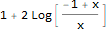

In [113]:
f[x_] = 2*Log[(x - 1) / x] + 1

<h2>Область определения</h2>

Выражение под логарифмом должно быть строго больше нуля, а выражение под знаменателем не равняться нулю

-1 + x
------ > 0
  x
x != 0
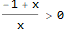

In [114]:
g1 = ((x - 1) / x) > 0
g2 = x != 0

Так как мы видим, что второе неравенство входит в решение первого, то решать его не будем

In [116]:
domain = Reduce[g1, x] 

x < 0 || x > 1

<h2>Чётность и периодичность функции</h2>

-1 + x
1 + 2 Log[------]
            x
            -1 - x
1 + 2 Log[-(------)]
              x
Функция четная
Функция нечетная
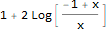
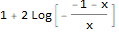

In [183]:
(* g = f[-x] == f[x]
(* FullSimplify[g]
TrigToExp[FullSimplify[g]] *)
If *)
f[x]
f[x] /. x->-x
res1 := f[x] == f[-x]
res2 := f[x] + -f[-x] == 0
If[res1 == True,"Функция четная", Null]
If[res2 == True,"Функция нечетная", Null]
If[Not[res1||res2], "Функция прочая", Null]

-1 + x
2 + 4 Log[------]
            x
          -1 + x
2 + 4 Log[------]
            x
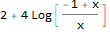
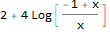

In [125]:
g = f[-x] + f[x]
FullSimplify[g]

Функция не чётна и не нечётна

In [77]:
g := f[x] - f[x + T]
Solve[g == 0, T, Reals]

{{T -> ConditionalExpression[0, x > 1 || x < 0]}}

По определению период функции не может быть равен нулю, следовательно данная функция не переодична

<h2>Точки пересечения графика с осями координат</h2>

Так как по области определения x не может равняться нулю, то сразу можно сделать вывод, что пересечения функции с
осью ординат нет, поэтому найдем точки пересечения с осью абцисс

1
{{x -> -----------}}
              1
       1 - -------
           Sqrt[E]
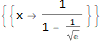

In [79]:
l = Solve[f[x] == 0, x]

<h2>Промежутки знакопостоянства</h2>

-Graphics-
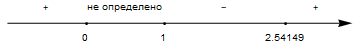

In [80]:
x0 := l[[1,1,2]]
margin := 0.2

Show[ Graphics[Arrow[{{-1, 0}, {3.4, 0}}]], 
      Graphics[Point[{0, 0}]],
      Graphics[Point[{1, 0}]],
      Graphics[Point[{x0, 0}]],
      
      Graphics[Text["+", {-0.5, 0.2}]],
      Graphics[Text["не определено", {0.5, margin}]],
      Graphics[Text["-", {(1 + x0) / 2, margin}]],
      Graphics[Text["+", {x0 + 0.4, margin}]],
      
      Graphics[Text["0", {0, -margin}]],
      Graphics[Text["1", {1, -margin}]],
      Graphics[Text[N[x0], {x0, -margin}]]
    ]

<h2>Промежутки возрастания и убывания</h2>

2
---------- == 0
(-1 + x) x
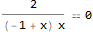

In [83]:
g := FullSimplify[D[f[x], x]] 
g == 0

Корней у данного уравнения нет

In [85]:
Reduce[g > 0, x] == domain

True

В области определения производная функции всегда больше нуля, а следовательно функция возрастает на всей своей области определения

<h2>Точки экстремума и значения в этих точках</h2>

Так как функция постоянно возрастает на своей области определения, то точек экстремума у функции нет

<h2>Непрерывность. Наличие точек разрыва и их классификация</h2>

По области определения видим, что нам надо проверить точки $x=0, 1$ на разрывы

In [86]:
If[Limit[f[x], x->0, Direction -> "FromAbove"] == Limit[f[x], x->0, Direction -> "FromBelow"] 
    && Limit[f[x], x->0, Direction -> "FromAbove"] == Infinity, 
"x = 0 - точка разрыва второго рода"]

x = 0 - точка разрыва второго рода

In [87]:
If[Limit[f[x], x->1, Direction -> "FromAbove"] == Limit[f[x], x->1, Direction -> "FromBelow"] 
    && Limit[f[x], x->1, Direction -> "FromAbove"] == -Infinity,
"x = 1 - точка разрыва второго рода", Null]

x = 1 - точка разрыва второго рода

Функция не непрерывна, так как терпит разрывы в точках $x=0, 1$. Оба разрыва второго рода

<h2>Асимптоты</h2>

<h3>Вертикальные асимптоты</h3>

Мы уже знаем, что пределы в точках $x=0, 1$ стремятся к бесконечности, поэтому они и будут являться вертикальными асимптотами

<h3>Горизонтальные асимптоты</h3>

In [88]:
If[Limit[f[x], x-> +Infinity] == Limit[f[x], x-> -Infinity], Print["y = ", Limit[f[x], x-> Infinity]], Null]

y = 1


<h3>Наклонные асимптоты</h3>

In [89]:
Limit[f[x]/x, x-> +Infinity]
Limit[f[x]/x, x-> -Infinity]

0
0

Наклонных асимптот нет, так как пределы равны нулю

-Graphics-
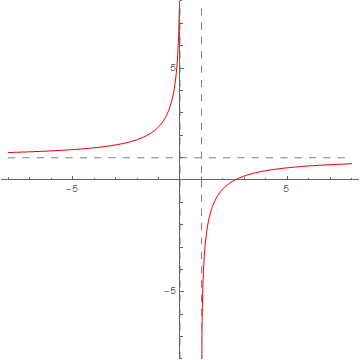

In [91]:
d := Plot[
    {f[x], y = 1}, 
    {x, -8, 8}, 
        AspectRatio -> 1, 
        PlotStyle -> {{Red}, {Gray, Dashing[{.02}]}, {Gray, Dashing[{.02}]}},
        Axes->{x, y},
        PlotRange-> {-8, 8}
]

Show[d, 
     Graphics[{Gray, Dashing[{.02}], Line[{{1, -8}, {1, 8}}]}],
     Graphics[{Gray, Dashing[{.02}], Line[{{0, -8}, {0, 8}}]}]
]